In [12]:
import pandas as pd
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\ML\Assignment 4\Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [13]:
data.columns = data.columns.str.strip()
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [14]:
data = data.drop('Serial No.',axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
m = data['Chance of Admit'].mean()
m

0.72435

In [20]:
for i in range(len(data)):
    if data.at[i,'Chance of Admit'] >=0.72:
        data.at[i,'Chance of Admit'] = 1
    else:
        data.at[i,'Chance of Admit'] = 0
        
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,1.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0


In [22]:
print(data.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [23]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [24]:
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']]
Y = data[['Chance of Admit']]

X.shape
Y.shape

(400, 1)

In [26]:
print(X.value_counts())  #Not Necessary

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA
290        100          1                  1.5  2.0  7.56    1
322        115          5                  4.0  4.5  9.36    1
323        113          4                  4.0  4.5  9.23    1
                        3                  4.0  4.0  8.88    1
                                                3.0  9.32    1
                                                            ..
312        101          2                  2.5  3.5  8.04    1
           100          2                  1.5  3.5  7.90    1
           99           1                  1.0  1.5  8.01    1
           98           1                  3.5  3.0  8.18    1
340        120          5                  4.5  4.5  9.91    1
Length: 400, dtype: int64


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred = model.predict(x_test)

Accuracy: 0.8375


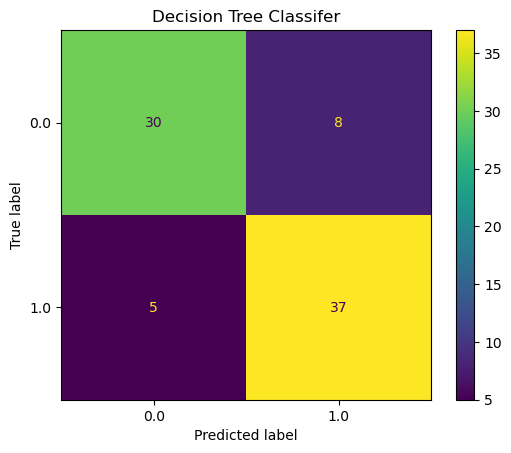

Classification Report :
               precision    recall  f1-score   support

         0.0       0.86      0.79      0.82        38
         1.0       0.82      0.88      0.85        42

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [37]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title("Decision Tree Classifer")
plt.show()
print("Classification Report :\n",classification_report(y_test,y_pred))